In [3]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.dates as mdates 

In [5]:
df=pd.read_csv("/content/gdrive/MyDrive/Google_Stock_Price_Train.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [7]:
df.shape # 80% of 1258 is 1006.

(1258, 6)

In [8]:
training_set = df.iloc[:1006, 1:2].values
test_set = df.iloc[1006:, 1:2].values

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1006):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(946, 60, 1)


In [10]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
30/30 [==============================] - 14s 179ms/step - loss: 0.0436
Epoch 2/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0070
Epoch 3/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0056
Epoch 4/100
30/30 [==============================] - 5s 178ms/step - loss: 0.0051
Epoch 5/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0044
Epoch 6/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0042
Epoch 7/100
30/30 [==============================] - 4s 146ms/step - loss: 0.0043
Epoch 8/100
30/30 [==============================] - 5s 160ms/step - loss: 0.0048
Epoch 9/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0040
Epoch 10/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0040
Epoch 11/100
30/30 [==============================] - 5s 182ms/step - loss: 0.0044
Epoch 12/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0035
Epoch 13/100

In [11]:
dataset_train = df.iloc[:1006, 1:2]
dataset_test = df.iloc[1006:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 312):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(252, 60, 1)


In [12]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


8/8 [==============================] - 2s 47ms/step


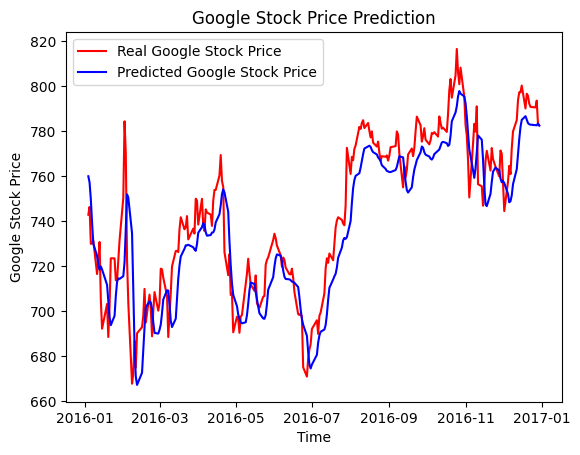

In [14]:
plt.plot(df.loc[1006:, 'Date'],dataset_test.values, color = 'red', label = 'Real Google Stock Price')
plt.plot(df.loc[1006:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()